In [198]:
import pandas as pd
import urllib
from urllib.request import urlretrieve
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

In [199]:
import pandas as pd
import urllib
from urllib.request import urlretrieve

In [200]:
url="http://mlr.cs.umass.edu/ml/machine-learning-databases/adult/adult.data"

In [201]:
urlretrieve(url,'adult.data.csv')

('adult.data.csv', <http.client.HTTPMessage at 0x1a2244b410>)

In [202]:
df = pd.read_csv('adult.data.csv',sep=' *, *', skiprows=1, na_values='?')
df

,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0.1,13.1,United-States,<=50K
0,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
1,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
2,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
3,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32555,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32556,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32557,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [203]:
df.columns=["age","workClass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]

In [204]:
df

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
1,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
2,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
3,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32555,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32556,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32557,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [205]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32559.000000,3.255900e+04,32559.000000,32559.000000,32559.000000,32559.000000
mean,38.581283,1.897851e+05,10.080500,1077.648269,87.309193,40.438312
std,13.640705,1.055497e+05,2.572698,7385.514002,402.972014,12.346871
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178330e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783700e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370580e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [206]:
df.isnull().sum()

age                  0
workClass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [207]:
from sklearn.impute import SimpleImputer

In [208]:
imp =SimpleImputer(strategy="most_frequent")
#list=["workClass","occupation","native-country"]
#for val in list:
df["workClass"]=imp.fit_transform(df["workClass"].values.reshape(-1,1))
df["occupation"]=imp.fit_transform(df["occupation"].values.reshape(-1,1))
df["native-country"]=imp.fit_transform(df["native-country"].values.reshape(-1,1))

In [209]:
df.isnull().sum()

age               0
workClass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [210]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [211]:
list1=['workClass','education','marital-status','occupation','relationship','race','sex','native-country','income']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [212]:
df

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
1,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
2,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
3,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
4,49,3,160187,6,5,3,7,1,2,0,0,0,16,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32555,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32556,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32557,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [213]:
df.describe()

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32559.000000,32559.00000,3.255900e+04,32559.000000,32559.000000,32559.000000,32559.000000,32559.000000,32559.000000,32559.000000,32559.000000,32559.000000,32559.000000,32559.000000,32559.000000
mean,38.581283,3.09429,1.897851e+05,10.298289,10.080500,2.611812,6.139040,1.446420,3.665837,0.669185,1077.648269,87.309193,40.438312,36.417058,0.240824
std,13.640705,1.10706,1.055497e+05,3.870369,2.572698,1.506245,3.972646,1.606798,0.848828,0.470514,7385.514002,402.972014,12.346871,6.056220,0.427590
min,17.000000,0.00000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.00000,1.178330e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.00000,1.783700e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.00000,2.370580e+05,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.00000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


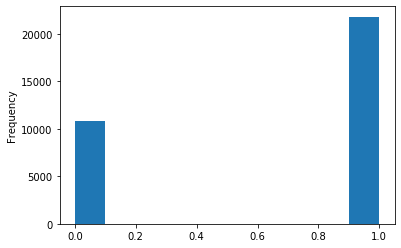

In [214]:
df['sex'].plot.hist()

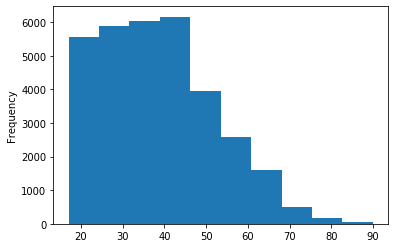

In [215]:
df['age'].plot.hist()

In [216]:
x=df.iloc[:,0:14]

In [217]:
x
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()


In [218]:
x = scale.fit_transform(x)
x

array([[0.28767123, 0.42857143, 0.13811345, ..., 0.        , 0.39795918,
        0.95      ],
       [0.49315068, 0.42857143, 0.15106831, ..., 0.        , 0.39795918,
        0.95      ],
       [0.15068493, 0.42857143, 0.22148843, ..., 0.        , 0.39795918,
        0.1       ],
       ...,
       [0.56164384, 0.42857143, 0.09482688, ..., 0.        , 0.39795918,
        0.95      ],
       [0.06849315, 0.42857143, 0.12849934, ..., 0.        , 0.19387755,
        0.95      ],
       [0.47945205, 0.57142857, 0.18720338, ..., 0.        , 0.39795918,
        0.95      ]])

In [219]:
y=df.iloc[:,14].values

In [220]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [221]:
y=y.reshape(-1,1)

In [222]:
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [223]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [224]:
x_train.shape

(26047, 14)

In [225]:
y_train.shape

(26047, 1)

In [226]:
x_test.shape

(6512, 14)

In [227]:
y_test.shape

(6512, 1)

In [228]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [229]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [230]:
pred=lg.predict(x_test)

In [231]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [232]:
print("accuracy score:",accuracy_score(y_test,pred))

accuracy score: 0.8189496314496314


In [233]:
print(confusion_matrix(y_test,pred))

[[4611  271]
 [ 908  722]]


In [234]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4882
           1       0.73      0.44      0.55      1630

    accuracy                           0.82      6512
   macro avg       0.78      0.69      0.72      6512
weighted avg       0.81      0.82      0.80      6512



In [235]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
import warnings 
warnings.filterwarnings('ignore')

In [236]:
model=[GaussianNB(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier()]

In [237]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    mscores= cross_val_score(m,x,y,cv=10)
    print(mscores)
    print(mscores.mean(),mscores.std())
    print('\n')
    

0.8006756756756757
[[4639  243]
 [1055  575]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.88      4882
           1       0.70      0.35      0.47      1630

    accuracy                           0.80      6512
   macro avg       0.76      0.65      0.67      6512
weighted avg       0.79      0.80      0.78      6512

[0.80411422 0.80436118 0.8009828  0.80804668 0.80282555 0.81203931
 0.79207617 0.80620393 0.80829493 0.8172043 ]
0.8056149074022241 0.006367011361872467


0.8263206388206388
[[4654  228]
 [ 903  727]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4882
           1       0.76      0.45      0.56      1630

    accuracy                           0.83      6512
   macro avg       0.80      0.70      0.73      6512
weighted avg       0.82      0.83      0.81      6512

[0.82100092 0.8264742  0.84060197 0.82831695 0.83261671 0.83445946
 0.82432432 0.84213759 0.8344086

In [238]:
from sklearn.externals import joblib
joblib.dump(lg,'lg_Hr.pkl')

['lg_Hr.pkl']